# 18-Month Hackathon Scenario 4: Microbial Regnets
The human gut microbiome is an increasingly important area of study for multiple infectious diseases and chronic conditions, including COVID-19 and long COVID. However, characterizing the dynamics of microbial ecology, which includes the interactions between microbes and with their environment, is a major challenge. This scenario is a proof-of-concept to demonstrate that ASKEM can utilize regulatory network models to grapple with such questions.

### Load dependencies

In [1]:
import os
import pyciemss
import torch
import pandas as pd

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

## Part I
Consider a simple system of 4 microbial species with a variety of competitive and mutualistic interactions amongst each other. Given a set of initial microbial populations, a set of inferred growth rates for each species, and an interaction matrix representing the negative (competitive or inhibitory) or positive (mutualistic or beneficial) effects that the presence of one species has on another in the microbial ecosystem… construct a model of the system utilizing the generalized Lotka-Volterra equation below: \begin{equation*} \frac{dx_i}{dt} = x_i \left(r_i + \sum_{j=1}^n a_{ij} x_j\right) \end{equation*}

This system represents a community of $n$ species, where $x_i$ is the population of species $i$, 
$r_i$ is the intrinsic growth rate of species $i$, and $a_ij$ represents the interaction coefficient between species $i$ and $j$.

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/gyorilab/mira/main/notebooks/hackathon_2024.02/scenario4/"

model1 = os.path.join(MODEL_PATH, "scenario4_4spec_regnet.json")

## Part II
Simulate the interactions between each species for a 30-day period, with time steps of 1 day. Plot the population size of each species over the 30-day time period. 

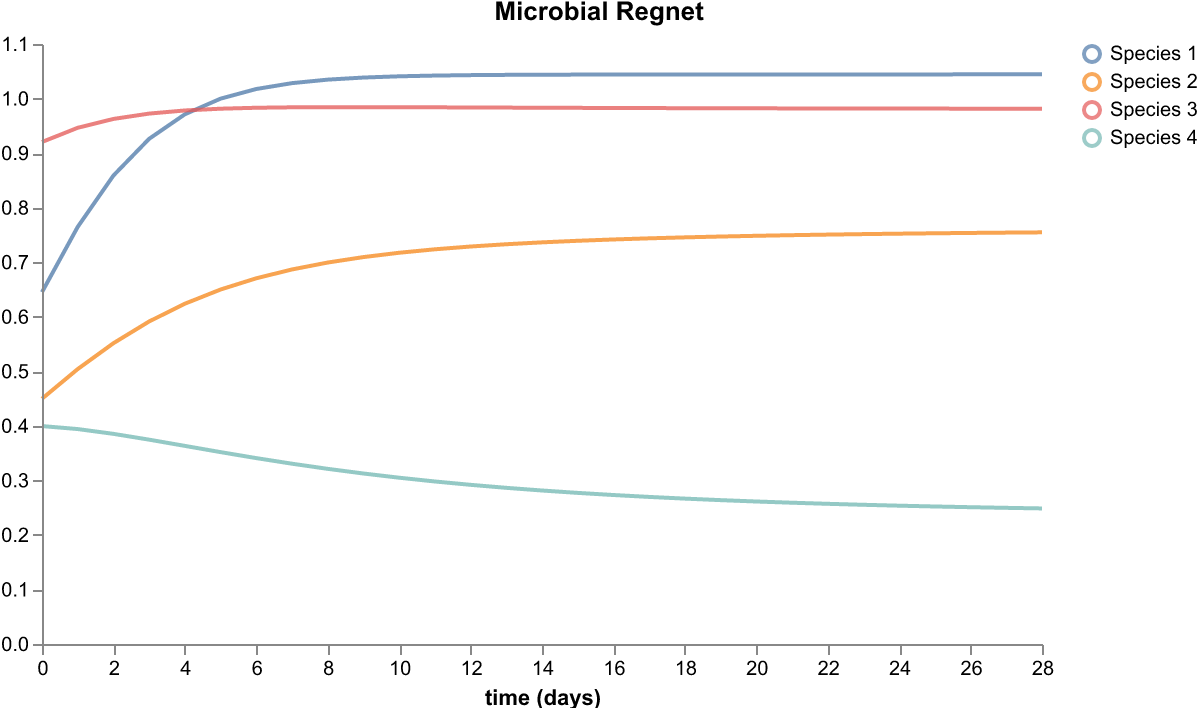

In [13]:
start_time = 1e-5
end_time = 30.0
logging_step_size = 1.0
num_samples = 10

microbial_sim = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)
# display(microbial_sim['data'].head())

# Plot results
nice_labels={"x_1_state": "Species 1", 
             "x_2_state": "Species 2",
             "x_3_state": "Species 3", 
             "x_4_state": "Species 4",
            }
schema = plots.trajectories(microbial_sim["data"], keep=".*_state", relabel=nice_labels)
schema = plots.set_title(schema, "Microbial Regnet")
schema = plots.set_title(schema, "time (days)", target="x")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Part III
Update the model to reflect a six species model.

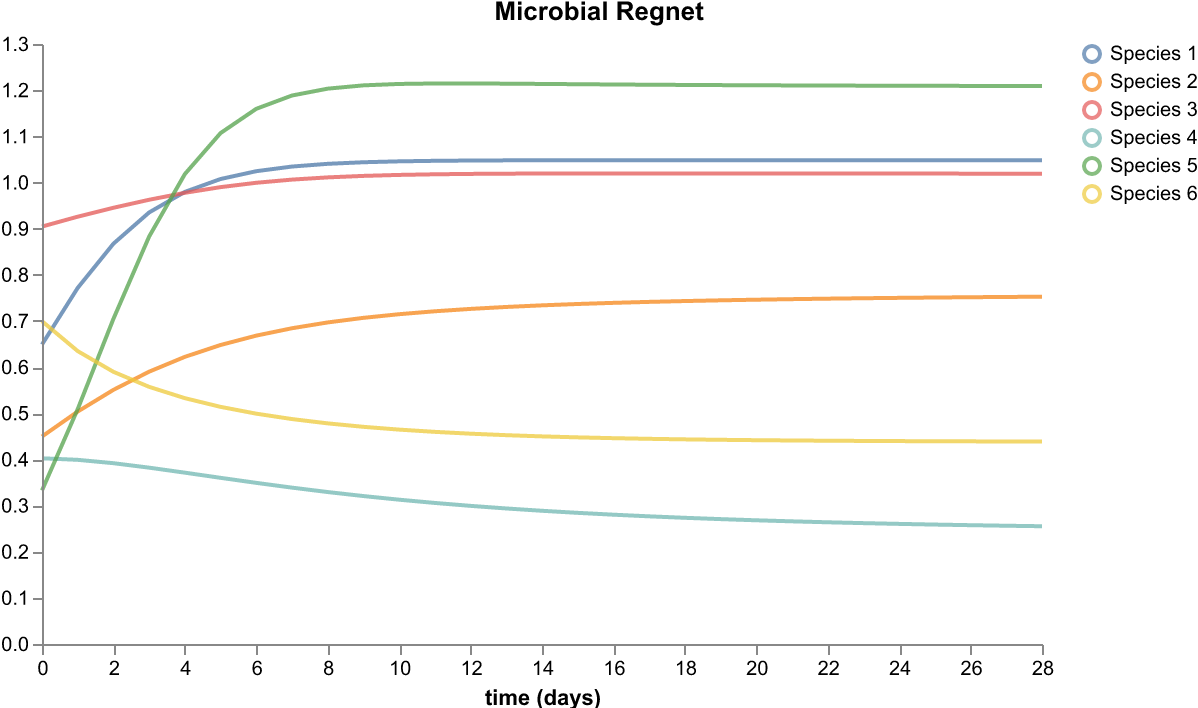

In [14]:
model2 = os.path.join(MODEL_PATH, "scenario4_6spec_regnet.json")

microbial_sim = pyciemss.sample(model2, end_time, logging_step_size, num_samples, start_time=start_time)
# display(microbial_sim['data'].head())

# Plot results
nice_labels={"x_1_state": "Species 1", 
             "x_2_state": "Species 2",
             "x_3_state": "Species 3", 
             "x_4_state": "Species 4",
             "x_5_state": "Species 5", 
             "x_6_state": "Species 6",
            }
schema = plots.trajectories(microbial_sim["data"], keep=".*_state", relabel=nice_labels)
schema = plots.set_title(schema, "Microbial Regnet")
schema = plots.set_title(schema, "time (days)", target="x")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)